In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

history = pd.DataFrame()

for i in range(9):
    f = open('spotify_data\StreamingHistory{}.json'.format(i), encoding='utf-8')
    data = json.load(f)
    df = pd.DataFrame(data)
    history = pd.concat([history, df], ignore_index=True)

history['hrs_played'] = history['msPlayed']/(1000*60*60)
history['year'] = pd.DatetimeIndex(history['endTime']).year
history['month'] = pd.DatetimeIndex(history['endTime']).month
history['day'] = pd.DatetimeIndex(history['endTime']).day

history

,endTime,artistName,trackName,msPlayed,hrs_played,year,month,day
0,2021-01-16 00:02,Lauv,Sad Forever,203520,0.056533,2021,1,16
1,2021-01-16 00:05,Lauv,Invisible Things,197306,0.054807,2021,1,16
2,2021-01-16 00:09,Lauv,Julia,218000,0.060556,2021,1,16
3,2021-01-16 00:13,Lauv,Modern Loneliness,252337,0.070094,2021,1,16
4,2021-01-16 00:16,Lauv,Drugs & The Internet,178560,0.049600,2021,1,16
...,...,...,...,...,...,...,...,...
85950,2022-01-16 23:47,Aly & AJ,Potential Breakup Song,25884,0.007190,2022,1,16
85951,2022-01-16 23:47,Anson Seabra,Welcome to Wonderland,90145,0.025040,2022,1,16
85952,2022-01-16 23:48,Lauren Spencer-Smith,Fingers Crossed,46376,0.012882,2022,1,16
85953,2022-01-16 23:49,Haley Joelle,Memory Lane,85724,0.023812,2022,1,16


In [3]:
listening_stats = history.groupby(['year', 'month', 'day']).agg({'msPlayed': ['sum'], 'trackName':['nunique']})
listening_stats['hrsPlayed','sum'] = (listening_stats['msPlayed','sum']/(1000*60*60)).round(2)
listening_stats

msPlayed trackName hrsPlayed
                     sum   nunique       sum
year month day                              
2021 1     16   32896526        67      9.14
           17   26342537       129      7.32
           18   35196217       179      9.78
           19   25421805       180      7.06
           20   21693269       106      6.03
...                  ...       ...       ...
2022 1     12   28814458       128      8.00
           13   33691913       158      9.36
           14   23387153       147      6.50
           15   51827699       261     14.40
           16   29221578       190      8.12

[366 rows x 3 columns]

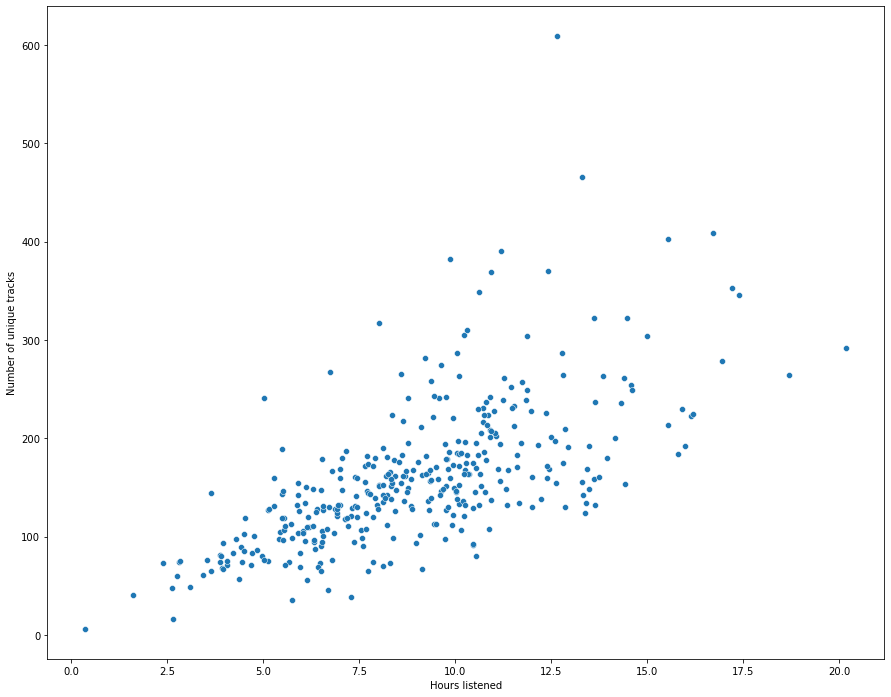

In [4]:
nunique = listening_stats['trackName', 'nunique']
hrs = listening_stats['hrsPlayed', 'sum']

plt.figure(figsize=(15,12))
sns.scatterplot(x=hrs, y=nunique)
plt.xlabel ('Hours listened')
plt.ylabel ('Number of unique tracks')
plt.show()

In [5]:
import numpy as np

dates = ['{}-{}-{}'.format(date[0], date[1], date[2])  for date in  np.array(listening_stats.index)]
hrs =  np.array(listening_stats['hrsPlayed']['sum'])

hrs_per_day = pd.DataFrame({'date':dates,'hrs': hrs})
hrs_per_day['weekly_avg'] = hrs_per_day['hrs'].rolling(7, center=True).mean()
hrs_per_day['monthly_avg'] = hrs_per_day['hrs'].rolling(30, center=True).mean()
hrs_per_day


,date,hrs,weekly_avg,monthly_avg
0,2021-1-16,9.14,NaN,NaN
1,2021-1-17,7.32,NaN,NaN
2,2021-1-18,9.78,NaN,NaN
3,2021-1-19,7.06,7.844286,NaN
4,2021-1-20,6.03,8.284286,NaN
...,...,...,...,...
361,2022-1-12,8.00,9.730000,NaN
362,2022-1-13,9.36,9.825714,NaN
363,2022-1-14,6.50,NaN,NaN
364,2022-1-15,14.40,NaN,NaN


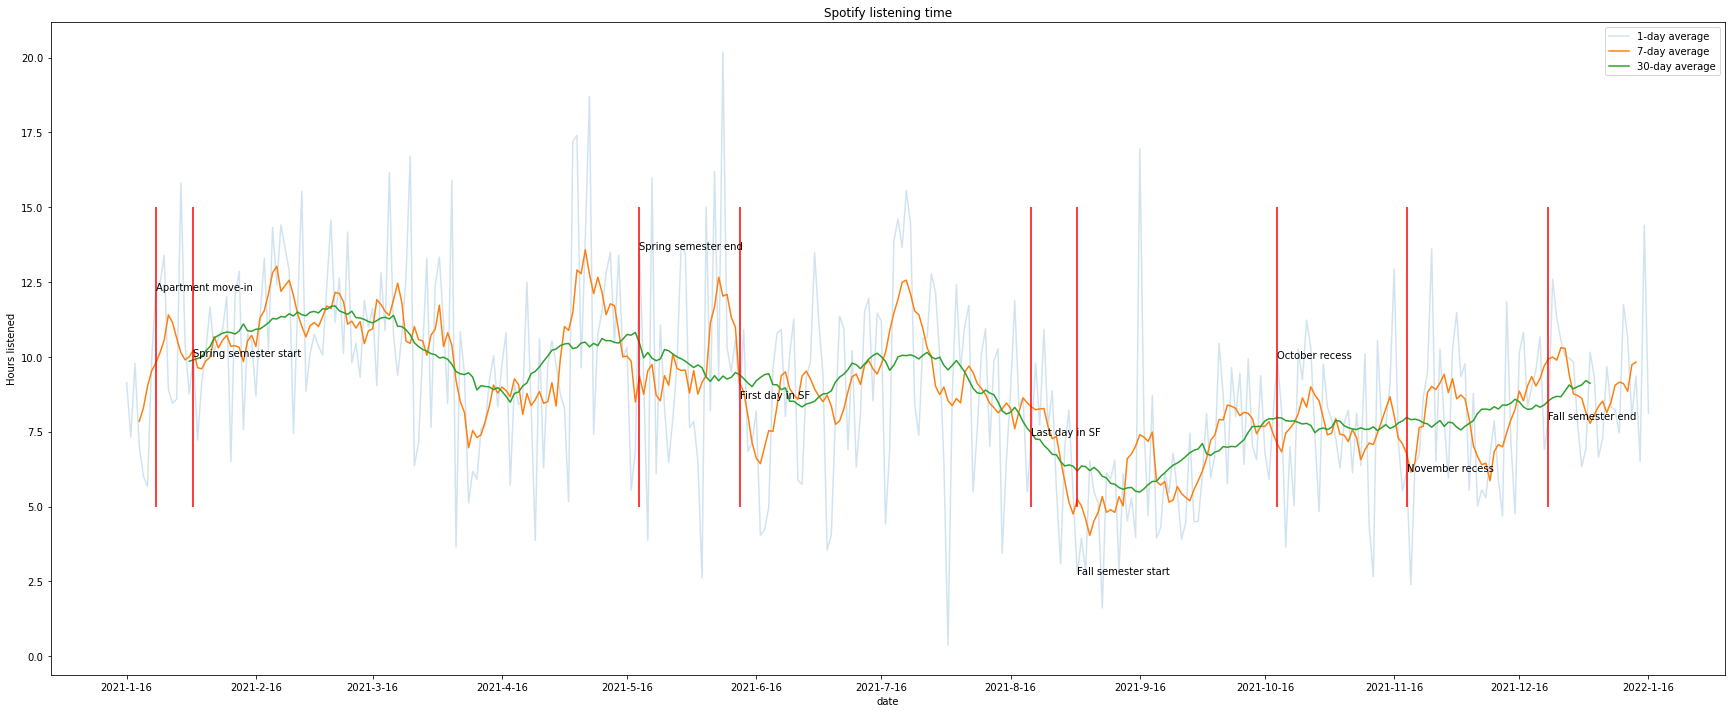

In [81]:
from matplotlib import dates

plt.figure(figsize=(30,12))
ax = sns.lineplot(data = hrs_per_day,  x='date', y ='hrs', label='1-day average', alpha=0.2)
ax = sns.lineplot(data = hrs_per_day,  x='date', y ='weekly_avg', label='7-day average')
ax = sns.lineplot(data = hrs_per_day,  x='date', y ='monthly_avg', label='30-day average')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 

significant_dates = {'2021-1-23': 'Apartment move-in',
                     '2021-2-1': 'Spring semester start', 
                     '2021-5-19':'Spring semester end',
                     '2021-6-12': 'First day in SF', 
                     '2021-8-21': 'Last day in SF',
                     '2021-9-1': 'Fall semester start',
                     '2021-10-19': 'October recess',
                     '2021-11-19': 'November recess',
                     '2021-12-23': 'Fall semester end'}

for date, desc in significant_dates.items():
    hrs  = np.array(hrs_per_day.loc[hrs_per_day['date'] ==date, 'hrs'])
    plt.vlines(x=date, ymin=5, ymax=15, color="red", )
    # plt.axvline(x=date)

    plt.text(date, hrs, desc)


plt.title('Spotify listening time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()

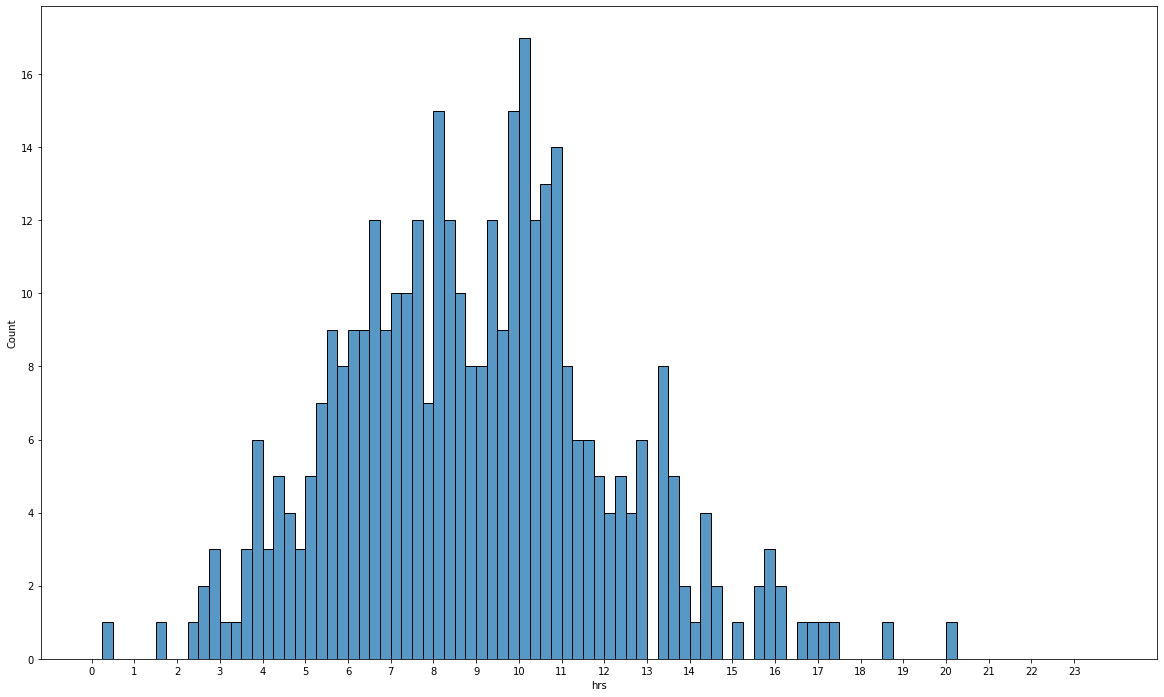

In [22]:
plt.figure(figsize=(20,12))

sns.histplot(hrs_per_day['hrs'], bins=np.arange(0, 24, 0.25))
plt.xticks(np.arange(24))
plt.show()